# PCA

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['class'] = iris.target
x = df.drop(labels='class', axis=1).values
y = df['class'].values

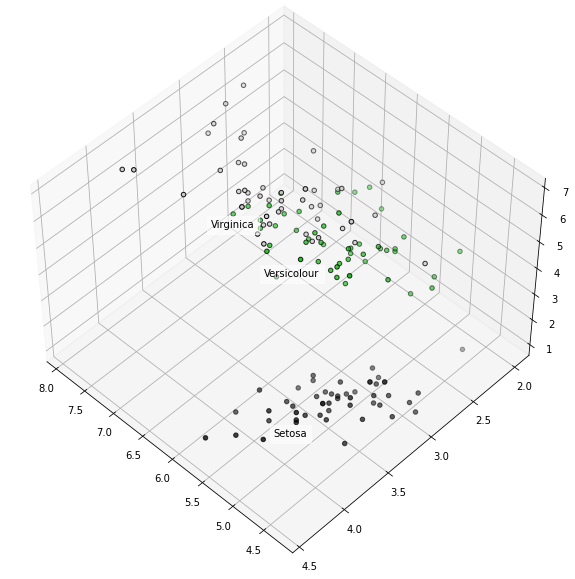

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8,8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor='k')

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 0.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

# from sklearn import decomposition
# pca = decomposition.PCA(n_components=3)
# pca.fit(X)
# X = pca.transform(X)

# for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
#     ax.text3D(X[y == label, 0].mean(),
#               X[y == label, 1].mean() + 1.5,
#               X[y == label, 2].mean(), name,
#               horizontalalignment='center',
#               bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# # Reorder the labels to have colors matching the cluster results
# y = np.choose(y, [1, 2, 0]).astype(float)
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
#            edgecolor='k')

# plt.show()

In [3]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
X[:10]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425]])

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

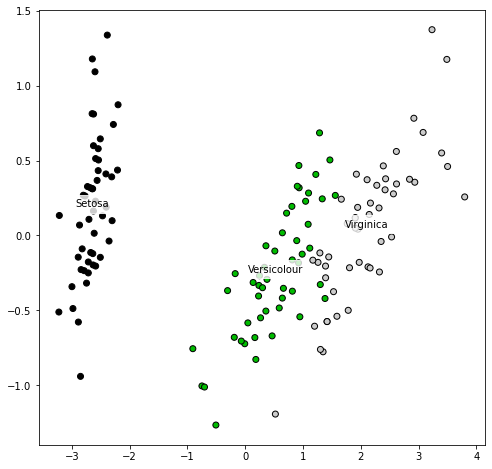

In [5]:
fig = plt.figure(figsize=(8,8))

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.nipy_spectral, edgecolor='k')

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    plt.text(X[y == label, 0].mean(),  X[y == label, 1].mean(), name,  horizontalalignment='center', bbox=dict(alpha=0.8, edgecolor='w', facecolor='w'))

plt.show()

# Clustering

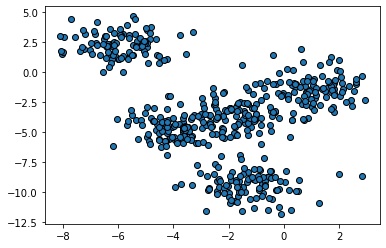

In [6]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, centers=5, n_features=2, random_state=2)
plt.scatter(X[:,0], X[:,1], edgecolor='k')

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [8]:
y = kmeans.predict(X)

In [9]:
y = kmeans.fit_predict(X)

In [10]:
y

array([2, 3, 0, 4, 1, 2, 4, 2, 1, 1, 0, 1, 4, 3, 1, 3, 2, 0, 1, 0, 3, 2,
       2, 4, 0, 2, 0, 4, 0, 2, 3, 2, 2, 1, 0, 2, 0, 0, 1, 1, 2, 3, 2, 1,
       3, 4, 2, 0, 3, 4, 2, 2, 3, 0, 2, 2, 3, 4, 0, 4, 3, 2, 1, 4, 0, 3,
       4, 0, 2, 2, 0, 2, 1, 4, 0, 1, 2, 4, 4, 4, 1, 3, 2, 1, 4, 1, 1, 2,
       1, 3, 3, 4, 3, 2, 3, 3, 2, 4, 3, 3, 4, 1, 3, 0, 3, 4, 3, 3, 3, 3,
       0, 4, 0, 0, 4, 0, 0, 1, 4, 1, 1, 4, 0, 1, 1, 1, 2, 1, 4, 0, 4, 2,
       2, 0, 4, 2, 2, 0, 0, 4, 4, 3, 2, 4, 1, 3, 1, 3, 2, 0, 0, 3, 2, 4,
       2, 0, 4, 4, 0, 4, 4, 2, 2, 2, 1, 1, 3, 0, 1, 0, 2, 4, 3, 2, 3, 1,
       0, 0, 4, 1, 1, 4, 3, 2, 2, 1, 2, 0, 4, 1, 2, 2, 0, 3, 2, 3, 0, 3,
       0, 3, 3, 0, 0, 4, 1, 0, 1, 1, 1, 4, 0, 4, 1, 2, 4, 4, 2, 3, 4, 0,
       0, 0, 3, 4, 1, 2, 3, 0, 4, 1, 4, 3, 3, 2, 4, 1, 3, 2, 1, 2, 4, 0,
       2, 1, 3, 0, 4, 2, 0, 3, 1, 3, 2, 3, 2, 3, 3, 3, 0, 1, 3, 4, 3, 2,
       3, 2, 1, 4, 3, 1, 0, 1, 0, 0, 0, 2, 4, 0, 0, 3, 1, 1, 0, 1, 0, 4,
       1, 0, 2, 2, 3, 4, 3, 2, 2, 2, 1, 3, 1, 2, 1,

In [11]:
kmeans.cluster_centers_

array([[-3.99782236, -4.6960255 ],
       [-1.48976417, -3.56531061],
       [-1.28478773, -9.3769836 ],
       [-5.92952036,  2.24987809],
       [ 1.08160065, -1.26589927]])

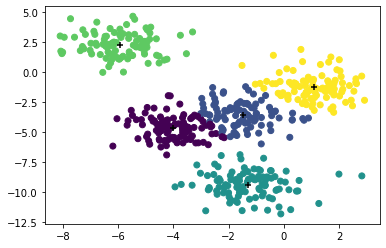

In [12]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', marker='+')

### Three Clusters

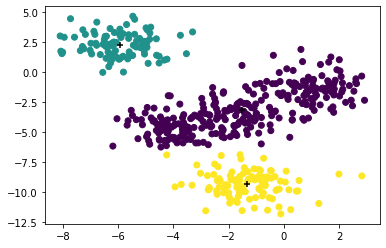

In [13]:
kmeans = KMeans(n_clusters=3)
y = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', marker='+')

### Picking the right K

C:\Users\Joshi008\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


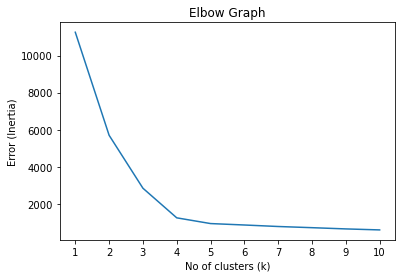

In [14]:
Error = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i).fit(X)
    Error.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt

plt.plot(range(1,11), Error)
plt.title("Elbow Graph")
plt.xlabel("No of clusters (k)")
plt.ylabel("Error (Inertia)")
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.show()

# Image Segmentation

In [15]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


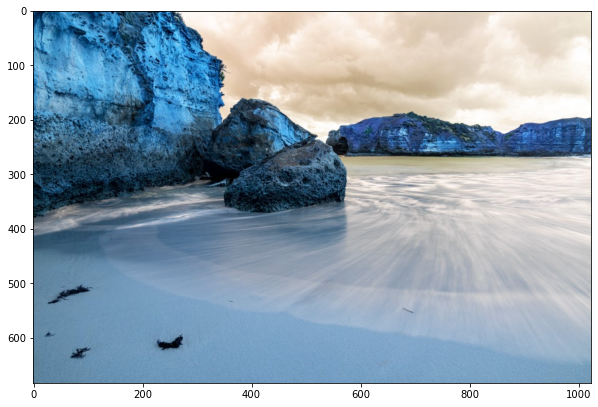

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

original_image = cv2.imread("C:\\ap\\wikimedia_image\\port_campbell.jpg")
plt.figure(figsize=(10,10))
plt.imshow(original_image)

In [17]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, (centers) = cv2.kmeans(pixel_values, 5, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert back to 8 bit values
centers = np.uint8(centers)
labels = labels.flatten()

NameError: name 'pixel_values' is not defined

In [ ]:
centers

In [ ]:
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)
plt.figure(figsize=(10,10))
plt.imshow(segmented_image)
plt.show()

# DBScan

In [ ]:
from sklearn.datasets import make_moons, make_circles
X, y = make_moons(n_samples=1000, noise=0.1)
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1])


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
y= kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
plt.figure(figsize=(10,10))

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=2)
y= dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
# vectorized = original_image.reshape((-1,3))

img_convert = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #defining image to experiment with number of clusters
img.shape
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)

In [ ]:
K = 4
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image2 = res.reshape((img_convert.shape))

figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

# Frequent Pattern Mining

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("fpdata.csv")
df

In [ ]:
%pip install mlxtend

In [ ]:
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
items = set()
for i in df:
    items.update(df[''+str(i)+''].unique())
items.remove(np.nan)

In [ ]:
items

In [ ]:
item_list = sorted(items)
encoded_vals = []

i=0
for index, row in df.iterrows():
    labels = dict()
    uncommons = list(items - set(row))
    commons = set(row).intersection(items)
    for item in commons:
        labels[item] = 1
    for item in uncommons:
        labels[item] = 0
    encoded_vals.append(labels)

one_hot_encoded_dataframe = pd.DataFrame(encoded_vals)
one_hot_encoded_dataframe

In [ ]:
freq_items = apriori(one_hot_encoded_dataframe, min_support = 0.2, use_colnames=True)
freq_items['sup_count'] = freq_items['support']*315
freq_items

In [ ]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.5)
rules